In [1]:
import requests
import numpy as np
import random


def load_countries_name(data_len):
    url = "https://randomuser.me/api/"
    params = {'results': data_len}
    response = requests.get(url, params=params)
    data = response.json()
    result = list(map(lambda x: x['location'], data['results']))  
    title = [country['country'] for country in result]
    return title
    
def generate_product_id(data_len):
    return list(np.array([random.randint(1, 25) for i in range(data_len)]))

def generate_region_sales(data_len):
    return list(np.array([round(random.randint(100, 500)) for i in range(data_len)]))
    
def generate_regions(size, city_names = []):
    regions = []
    index = 1
    unique_cities = list(set(city_names))
    for i in range(size):
        if len(unique_cities) > 0:
            city = unique_cities.pop()
            regions.append(f"Region {index}")
        else:
            regions.append(f"Region {index}")
            index += 1
            if index > 5:
                index = 1
                random.shuffle(regions)
    return regions
    
data_len = 50
data = np.column_stack((generate_product_id(data_len), generate_region_sales(data_len), generate_regions(data_len, ['hawaii','tokio','duseldorf','tokio','vashington'])))
data

array([['13', '364', 'Region 3'],
       ['5', '199', 'Region 4'],
       ['14', '284', 'Region 1'],
       ['21', '274', 'Region 1'],
       ['19', '224', 'Region 4'],
       ['9', '103', 'Region 3'],
       ['18', '397', 'Region 5'],
       ['18', '398', 'Region 2'],
       ['7', '258', 'Region 3'],
       ['10', '336', 'Region 4'],
       ['24', '393', 'Region 4'],
       ['6', '330', 'Region 1'],
       ['11', '464', 'Region 3'],
       ['10', '476', 'Region 4'],
       ['16', '275', 'Region 1'],
       ['13', '182', 'Region 4'],
       ['16', '220', 'Region 2'],
       ['2', '289', 'Region 2'],
       ['25', '392', 'Region 1'],
       ['16', '217', 'Region 1'],
       ['2', '286', 'Region 5'],
       ['5', '152', 'Region 1'],
       ['12', '177', 'Region 5'],
       ['19', '170', 'Region 5'],
       ['15', '285', 'Region 1'],
       ['19', '440', 'Region 3'],
       ['14', '428', 'Region 3'],
       ['21', '155', 'Region 4'],
       ['21', '452', 'Region 3'],
       ['17', '314', 

# Общая сумма продаж для всех продуктов

In [2]:
m = (data[:,1:-1]).astype(int)
columns = np.sum(m, axis = 0)
int(columns)

14686

# Сколько уникальных регионов продаж существует?

In [3]:
m = data[:,2:]
print(len(np.unique(m)))

5


# Какова средняя сумма продаж на продукт?

In [4]:
m = data[:,1:-1].astype(int)
columns = np.average(m, axis = 0)
int(columns)

293

# Какой продукт имеет наибольшую сумму продаж?

In [5]:
sales = data[:, 1].astype(int) 
max_sale_idx = np.argmax(sales)
print("ID продукта с наибольшей суммой продаж:", data[max_sale_idx, 0])

ID продукта с наибольшей суммой продаж: 10


# Рассчитайте сумму продаж для каждого региона продаж. Гистограмма

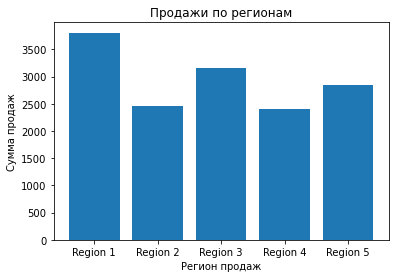

In [10]:
import matplotlib.pyplot as plt

r = np.unique(data[:, 2])
region_sales = {}
for region in r:
    region_data = data[data[:, 2] == region]
    sales_sum = np.sum(region_data[:, 1].astype(int))
    region_sales[region] = sales_sum
    
region_sales_list = [region_sales[region] for region in r]
plt.bar(r, region_sales_list)
plt.xlabel('Регион продаж')
plt.ylabel('Сумма продаж')
plt.title('Продажи по регионам')
plt.show()

# Топ 5 продуктов по продажам. Гистограмма

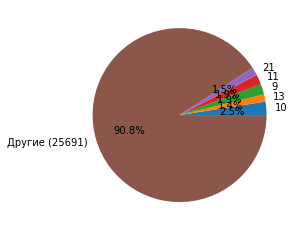

In [13]:
sales = data[:, 1].astype(int)
sorted_data = data[sales.argsort()[::-1]]
top5_data = sorted_data[:5]
other_sales = sales[5:].sum()
labels = [x[0] for x in sorted_data[:5]] + ["Другие"]
other_sales = sales[5:].sum()
values = np.append(sales[:5], other_sales)
for i, row in enumerate(sorted_data):
    if i < 5:
        continue
    else:
        other_sales += int(row[1])
labels[-1] = "Другие ({0})".format(other_sales)
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()